Name: isha shah & hetal panchal


ROLL NO.: C120 & C119

DIV:C

B.T.I COMPUTER












**AIM:COIN DETECTION**

Processing enhancement of a digital Image is really important now a day, as it plays a crucial role in mobile technology, multimedia, medicine. In this project implementation of circle detection and coin counting is done.

Importing libraries

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from scipy import ndimage
import cv2

reading the image using cv2 library and displaying the image

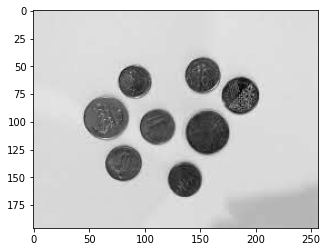

In [2]:
img=cv2.imread('coins1.jpg',0)
plt.imshow(img,cmap="gray")

 Ploting histogram of the coin image and selecting the threshold for binary threholding from the below graph we selected the threhold as 80 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0.5, 1.0, 'histogram')

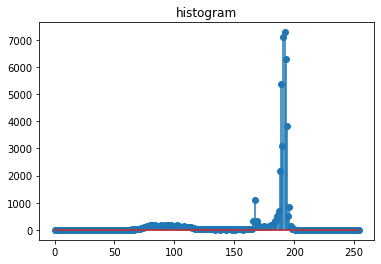

In [3]:
count,value=np.histogram(img,255,[0,255])
plt.stem(count)
plt.title('histogram')

 binary thresholding the image from the above histogram
 taking treshold as 80 and bluring the image berfore thresholding make the colour transition from one side of an edge in the image to another smooth rather than sudden

(-0.5, 258.5, 197.5, -0.5)

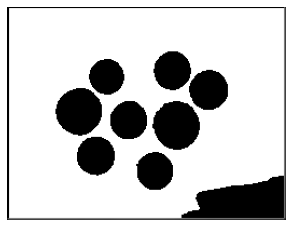

In [13]:
from scipy import signal
img=cv2.imread('coins1.jpg',0)
r,c=img.shape
#bluring the image
mask=np.ones([3,3], dtype=int)
mask=mask/9
output = signal.convolve2d(img,mask)
#performing binary thresholding with threshold=80
for i in range(r):
  for j in range(c):
    if output[i,j]>180:
      output[i,j]=255
    else:
      output[i,j]=0

plt.figure(figsize=(5,5))
plt.imshow(output,cmap="gray")
plt.axis('off')


opening the image removing the small noise and preserving the shape of coins

(-0.5, 258.5, 197.5, -0.5)

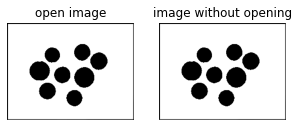

In [12]:
#defining struchering element
SE=cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
#errording the image
E=cv2.erode(output,SE)
#dilating the image
open=cv2.dilate(E,SE)
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
plt.imshow(open,cmap='gray')
plt.title('open image')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(output,cmap='gray')
plt.title('image without opening')
plt.axis('off')

smothning the image as edges can be seen more clear and applying sobal mask for detecting the edges of the image

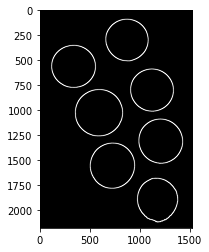

In [ ]:
from scipy import signal
#smothning the image
mask=np.ones([7,7], dtype=int)
mask=mask/49
smoth = signal.convolve2d(open,mask)
#Vertical sobal mask
maskv=[[-1,-0,1],[-2,0,2],[-1,0,1]]
outputd1= signal.convolve2d(smoth,maskv)
#horizontal sobal mask
maskh=[[-1,-2,-1],[0,0,0],[1,2,1]]
outputh= signal.convolve2d(smoth,maskh)
out=abs(outputd1)+abs(outputh)
plt.imshow(out,cmap="gray",vmin=0,vmax=255)

In [ ]:
lab, number = ndimage.measurements.label(open)

Plotting the center of the coins

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:452: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:459: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:464: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:993: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)


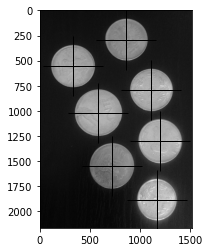

In [ ]:
fig = plt.figure("Centers")
plt.imshow(np.where(open == 1, open, np.nan), origin = "upper")
ax = fig.add_subplot(1,1,1)
#ax.axis("off")
for i in range(1,np.max(number)+1):
    x,y= np.nonzero(np.where(lab==i,1,0))
    xmean=x.mean()
    ymean=y.mean()
    plt.plot(ymean,xmean,"k+-", markersize=60)

plt.imshow(img,cmap="gray")

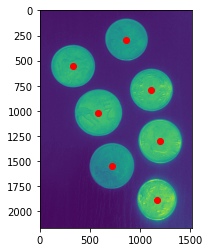

In [ ]:
fig = plt.figure()
plt.imshow(img, origin = "upper")

centers = []
for l in np.arange(1, number+1):
        y, x = np.where(lab == l)
        centers.append([x.mean(), y.mean()])
centers = np.array(centers).T
plt.plot(centers[0], centers[1], "or")
plt.show()

In [ ]:
#counting the coints
np.unique(lab)

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32)

CONCLUSION:


**WE performed the coin detetion on an image**


* we read the image and plot the histogram for the image to find the threshold
* we perform bluring before thresholding bluring make the colour transition from one side of an edge in the image to another smooth rather than suddenbinary thresholding on the image so we can seperate the coins from background
* we performed opening on the thresholded image which removed unwanted noise and preserving the shape of coins
* we performed smothning so we can see the edges more clear and better then we perform edge detection using vertical sobal mask and horizontal sobal mask
* we found the centers of the coins and plotted them and counted the total number of coins









